In [1]:
import numpy as np
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
import scipy
import scipy.optimize
from scipy.special import gammaln

def facln(n):
    return gammaln(n+1)

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
l = .7

In [3]:
def sample(n):
  return scipy.random.exponential(l, n)

In [4]:
def gen_lln(sample):
    n = len(sample)
    s = sum(sample)
    def lln(l):
        return np.log(l)*n - l*s
    return lln

def gen_likelihood(sample):
    lln = gen_lln(sample)
    def likelihood(l): return np.exp(lln(l))
    return likelihood

In [5]:
def estimate(sample, bounds=(0, 10**5)):
    lln = gen_lln(sample)
    neglln = lambda z: -lln(z)
    l_0 = scipy.optimize.minimize(
        neglln,
        1,
        method="l-bfgs-b",
        bounds=(bounds,)).x[0]
    return l_0

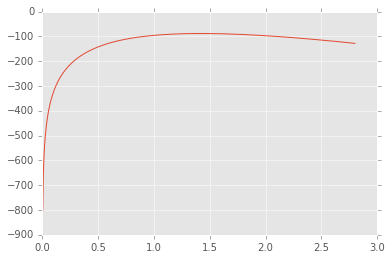

In [6]:
s = pd.Series(sample(136))
lln = gen_lln(s)
likelihood = gen_likelihood(s)
ab = np.linspace(-4*l, 4*l, 1024)
plt.plot(ab, [lln(t) for t in ab])

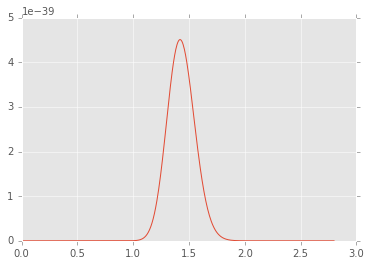

In [7]:
plt.plot(ab, [likelihood(t) for t in ab])

In [8]:
def estimate_simple(sample):
       n = len(sample)
       return n/sum(sample)
def n_to_l(n):
    return estimate_simple(sample(n))

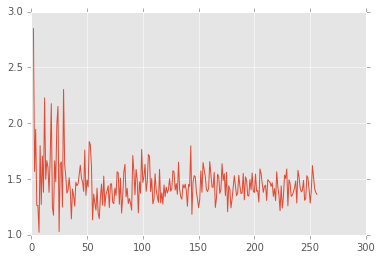

In [9]:
nn = [k for k in range(2, 256+1)]
plt.plot(nn, [n_to_l(n) for n in nn])

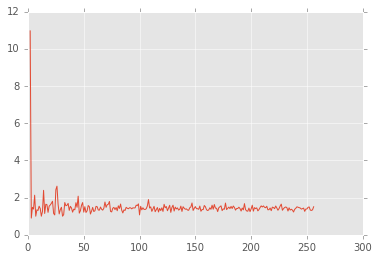

In [10]:
plt.plot(nn, [estimate(sample(n)) for n in nn])